# MPHY0041 - CW1 - Notebook 2023/24

In [2]:
#import several libraries
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

## Exercise 1: Decision Boundaries

In [3]:
df = pd.read_csv('PPMI_DATSCAN.csv')
df.head()

,Unnamed: 0,COHORT_DEFINITION,ENROLL_AGE,DATSCAN_CAUDATE_R,DATSCAN_CAUDATE_L,DATSCAN_PUTAMEN_R,DATSCAN_PUTAMEN_L,NP2PTOT
0,0,Healthy Control,69.1,2.99,3.43,2.94,2.63,0.0
1,1,Parkinson's Disease,65.1,1.56,1.12,0.62,0.48,3.0
2,2,Parkinson's Disease,67.6,2.13,2.28,0.80,0.83,15.0
3,3,Parkinson's Disease,56.7,2.19,1.27,0.66,0.57,5.0
4,4,Parkinson's Disease,57.5,2.28,2.12,0.76,0.15,4.0


### a)

In [4]:
#Remove SWEDD subjects from the dataset
df_filtered = df[df['COHORT_DEFINITION'] != 'SWEDD']

#Compute means for DaT scan for 'HC' and 'Parkinsons' groups
mean_HC = df_filtered[df_filtered['COHORT_DEFINITION'] == 'Healthy Control']['DATSCAN_PUTAMEN_R'].mean()
mean_Parkinsons = df_filtered[df_filtered['COHORT_DEFINITION'] == 'Parkinson\'s Disease']['DATSCAN_PUTAMEN_R'].mean()

#Compute the standard deviation for DaT scan in the right putamen, assuming a Gaussian distribution
#Standard deviation for DaT scan for entire dataset after SWEDD subjects have been removed: 
sd = df_filtered['DATSCAN_PUTAMEN_R'].std()

print(f"Mean for Healthy Control group: {mean_HC:.3g}")
print(f"Mean for Parkinson's Disease group: {mean_Parkinsons:.3g}")
print(f"Standard deviation: {sd:.3g}")

#Compute the decision boundary between the two disease groups (with the prior probabilities π_HC = π_PD = 0.5)
decision_boundary = (mean_HC + mean_Parkinsons) / 2

print(f"Decision boundary: {decision_boundary:.3g}")

Mean for Healthy Control group: 2.16
Mean for Parkinson's Disease group: 0.833
Standard deviation: 0.691
Decision boundary: 1.49


### b)

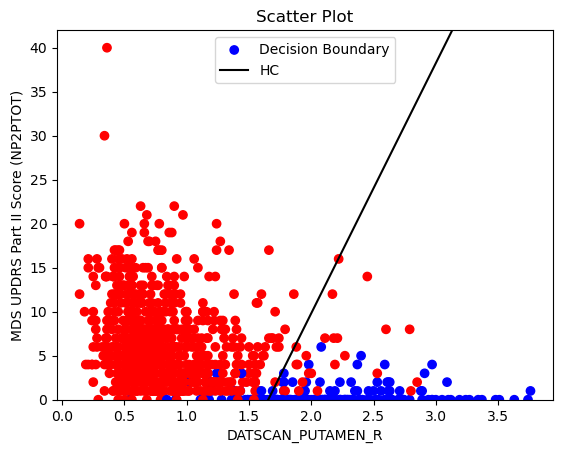

In [5]:
from sklearn.linear_model import LinearRegression

#Further filter to include only Healthy Control and Parkinson's Disease data
df_further_filtered = df_filtered[(df_filtered['COHORT_DEFINITION'] == 'Healthy Control') | (df_filtered['COHORT_DEFINITION'] == 'Parkinson\'s Disease')]

#Set input features (x) and target (y)
X = df_further_filtered[['DATSCAN_PUTAMEN_R', 'NP2PTOT']]
y = df_further_filtered['COHORT_DEFINITION'].map({'Healthy Control': 0, 'Parkinson\'s Disease': 1})  # Convert to binary labels

#Train the Linear Regression model
lr = LinearRegression()
lr.fit(X, y)

# Generate scatter plot with color mapping for 'COHORT_DEFINITION'
plt.scatter(X['DATSCAN_PUTAMEN_R'], X['NP2PTOT'], c=y.map({0: 'blue', 1: 'red'}))

# Calculate and plot the decision boundary
x1_range = np.linspace(X['DATSCAN_PUTAMEN_R'].min(), X['DATSCAN_PUTAMEN_R'].max(), 100)
x2_boundary = (0.5 - lr.intercept_ - lr.coef_[0] * x1_range) / lr.coef_[1]
plt.plot(x1_range, x2_boundary, label='Decision Boundary', color='black')

# Customize the plot
plt.xlabel('DATSCAN_PUTAMEN_R')
plt.ylabel('MDS UPDRS Part II Score (NP2PTOT)')
plt.title('Scatter Plot')
plt.legend(['Decision Boundary', 'HC', 'PD'])
plt.ylim(0, 42)
plt.show()

### c)

In [ ]:
#Compute means for all three groups for DaT scan in the right putamen 
mean_All = df. 

## Exercise 2: Regression Implementations

### a) Complete the code for Linear Regression RSS with L2 regularization

In [ ]:
#implement ridge regression (linear regression with L2 regularization)
#this function fits Linear Regression with L2 regularization (ridge regression) using Gradient Descent
#inputs are
#y:         continous values
#features:  input feature matrix
#lam:       lambda value for regularization
#eps:       tolerance for the stopping criterion for gradient descent
#rho:       step size in gradient descent
#maxiter: maximum iterations

#function returns the intercept_ (\beta_0) and the coefficients_ (\beta_i)
def fit_RSSl2_GRAD(y, features, lam=0.00, eps=1e-9, rho=1.0, maxiter=10000):
    #sample size
    N = features.shape[0]
    #feature dim
    p = features.shape[1] + 1
    #initalize beta with 0s
    betas_ = np.zeros(p)
    #add column of 1 to X
    X = np.c_[np.ones(N),features]
    #compute predictions
    yhat =  X @ betas_

    old_cost = 100000000
    #compute the cost (J) of the current solution
    #COMPLETE THIS LINE
    cost =

    #as long as the there is a differentce between old and new cost that is larger
    #than the tolerance we update the parameters
    cnt = 0
    while (abs(old_cost - cost) > eps) and (cnt < maxiter):
        cnt += 1
        #beta update (one step of the gradient descent)
        #COMPLETE THIS SECTION
        betas_ =

        #update predictions
        yhat =  X @ betas_

        old_cost = np.copy(cost)
        #recompute cost
        #COMPLETE THIS LINE
        cost =

        #reduce learning rate in case the cost increased
        #reset to previous solution
        if cost > old_cost:
            rho /= 2
    return(betas_)

### b) Complete the code for Linear Regression with LogCosh loss via Gradient Descent

In [ ]:
#this function fits Linear Regression with LogCosh loss using Gradient Descent
#inputs are
#y:         continous values
#features:  input feature matrix
#eps:       tolerance for the stopping criterion for gradient descent
#rho:       step size in gradient descent
#maxiter: maximum iterations

#this function returns the beta coefficients for a Linear Regression model
#the first entry (betas[0] is the intercept)
def fit_logcosh_GRAD(y, features, eps=1e-9, rho=1.0, maxiter=10000):
    #sample size
    N = features.shape[0]
    #feature dim
    p = features.shape[1] + 1
    #initalize beta with 0s
    betas_ = np.zeros(p)
    #add column of 1 to X
    X = np.c_[np.ones(N),features]
    #compute predictions
    yhat =  X @ betas_

    old_cost = 100000000
    #compute the cost (J) of the current solution
    #COMPLETE THIS LINE
    cost =
    #as long as the there is a differentce between old and new cost that is larger
    #than the tolerance we update the parameters
    cnt = 0
    while (abs(old_cost - cost) > eps) and (cnt < maxiter):
        cnt += 1
        #beta update (one step of the gradient descent)
        #COMPLETE THIS SECTION
        betas_ =

        #update predictions
        yhat =  X @ betas_

        old_cost = np.copy(cost)
        #recompute cost
        #COMPLETE THIS LINE
        cost =

        #reduce learning rate in case the cost increased
        #reset to previous solution
        if cost > old_cost:
            rho /= 2
    return(betas_)

### c) Complete the code for linear regression with linear models for mean and standard deviation

* Deriving the Loss function:

* Deriving the gradients:


In [ ]:
#this function fits Linear Regression flexible noise component N(mu(x), sigma(x))
#inputs are
#y:         continous values
#features:  input feature matrix
#eps:       tolerance for the stopping criterion for gradient descent
#rho:       step size in gradient descent
#maxiter: maximum iterations

#this function returns the beta coefficients for a Linear Regression model
#the first entry (betas[0] is the intercept)
def fit_norm_GRAD(y, features, eps=1e-9, rho=0.1, maxiter=10000):
    #sample size
    N = features.shape[0]
    #feature dim
    p = features.shape[1] + 1
    #initalize beta with 0s
    betas_ = np.zeros(p)
    thetas_ = np.ones(p)
    #add column of 1 to X
    X = np.c_[np.ones(N),features]
    #compute predictions
    mu_hat =  X @ betas_
    sigma_hat = X @ thetas_

    old_cost = 100000000
    #compute the cost (J) of the current solution
    #COMPLETE THIS LINE
    cost =
    #as long as the there is a differentce between old and new cost that is larger
    #than the tolerance we update the parameters
    cnt = 0
    while (abs(old_cost - cost) > eps) and (cnt < maxiter):
        cnt += 1
        #beta update (one step of the gradient descent)
        #COMPLETE THIS SECTION
        betas_ =
        thetas_ =

        #update probabilities
        mu_hat =  X @ betas_
        sigma_hat = X @ thetas_

        old_cost = np.copy(cost)
        #recompute cost
        #COMPLETE THIS LINE
        cost =

        #reduce learning rate in case the cost increased
        #reset to previous solution
        if cost > old_cost:
            rho /= 2
    return(betas_, thetas_)

## Exercise 3: Suggest improvements to the ML pipeline



1.   
2.  
3.
4.



## Exercise 4: Retinal Fluid Segmentation

In [ ]:
import imageio.v3
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import svm
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import image
from skimage.filters import scharr
from skimage.color import rgb2gray


In [ ]:
#helper function to read image along with mask
def read_img(pt, iname):
  img_f = os.listdir(pt + "/" + iname + "/images/")[0]
  msk_f = os.listdir(pt + "/" + iname + "/masks/")[0]
  im  = imageio.v3.imread(pt + "/" + iname + "/images/" + img_f)
  msk = imageio.v3.imread(pt + "/" + iname + "/masks/" + msk_f)
  return (im, msk)

In [ ]:
train_path = './train/'
vali_path = './vali/'
test_path = './test/'

In [ ]:
#this function takes an input image and
#does the manual feature extraction
#currently it simply turns the color image to a gray scale image.
#but you can modify this function to add new features
#e.g., by appling any filters.

#if the variable nchan is sset to True, then the return is just the number of channels

def preprocess_img(img, nchan=False):
    #some examples for pre-processing:

    ##do nothing
    ##copy all three channels
    #res = img

    ##just use the green channel
    #res = img[:,:,1]

    ##single channel gray
    res = rgb2gray(img) * 255

    #note some of the images are bit 'cut off' this sets the white regions to black
    res[res > 250] = 0

    #some examples for possible extensions:
    ##add the red channel
    #res = np.dstack( (res, img[:,:,1]))

    #add some edge filter applied to the green channel
    #res = np.dstack((res, scharr(img[:,:,1]) * 255))

    #NOTE: the skimage library contains useful filters

    #if nchan is True, then just return the number of channels
    #the pre-processing produces
    if nchan:
        try:
            return(res.shape[2])
        except IndexError:
            return(1)
    return (res)

In [ ]:
#turn the images into a training dataset
#train_path:    path to the training data
#n_train_patch: number of patches to be extracted per image
#ps :           patch size as integer (e.g., 7 -> 7x7 patches)
#chan:          number of 'channels' the pre_processed image will have

def create_training_set(train_path, n_train_patch, ps, chan, verbose=True):
  if verbose:
    print("Extracting " + str(n_train_patch) + " pataches of size " + str(ps) + "x" + str(ps) + " from each image.")

  #dimension of square patch
  patch_dim = (ps, ps)
  #center of the patch
  patch_cnt = int((ps-1)/2)
  #dimension of the 'flattened' patch

  flat_dim = ps*ps*chan

  #initialize Y and X
  Y = []
  X = np.empty((0,flat_dim))

  train_imgs = os.listdir(train_path)

  for s in np.arange(400):
    if verbose:
      print("Extracting data from subject: " + str(s))

    img_m, msk_x = read_img(train_path, train_imgs[s])

    #binarize the mask
    msk = (msk_x > 0) * 1

    #extract features
    frames = preprocess_img(img_m)
    #add the labels as an additional channel
    frames = np.dstack((frames, msk))

    #sample patches
    patch = image.extract_patches_2d(frames, patch_dim, max_patches=n_train_patch)

    #each patch receives the label of the center value in the 'label' channel
    Y_tmp = patch[:,patch_cnt,patch_cnt,chan] == 1
    #turn patches into a matrix where each row corresponds to all the features
    #of one patch
    X_tmp = np.reshape(patch[:,:,:,0:chan],(n_train_patch,flat_dim))

    #concatenate with Y and X
    Y.extend(Y_tmp)
    X = np.concatenate((X, X_tmp), axis=0)
  return (Y, X)

In [ ]:
#this function takes X and Y as input and
#oversamples the target class ('1') with a ratio:1 ratio (default: 200)
#from the overall size of X a sub_sample of 'sample_size' is randomly selected
def sub_sample(X, Y, sample_size=10000, ratio=200):
  #resampling with 200:1 chance
  weights = np.array([1] * len(Y))
  weights[Y] = 200
  weights = weights/np.sum(weights)

  #sample 10000 of the generated patches
  idx = np.random.choice(X.shape[0],sample_size,replace=False, p=np.array(weights))

  Xsub = X[idx,:]
  Ysub = np.array(Y)[idx]

  return Xsub, Ysub, idx

In [ ]:
im, msk = read_img(train_path, "10DME_F")
#show the input image
plt.imshow(im)
#obtain the number of channels
chan = preprocess_img(im, True)

### code for parts a) - f)